coral-app.py is a Flask app which exposes a tensorflow model as an endpoint. To run the app and expose over a network: 

 $ python3 coral-app.py

Then use curl to query:

In [1]:
!curl -X POST -F image=@images/test-image3.jpg 'http://localhost:5000/v1/vision/detection'

{"predictions":[{"confidence":"98.828125","label":"person","x_max":601,"x_min":447,"y_max":522,"y_min":103},{"confidence":"95.3125","label":"person","x_max":443,"x_min":294,"y_max":534,"y_min":91},{"confidence":"26.953125","label":"horse","x_max":795,"x_min":631,"y_max":542,"y_min":356},{"confidence":"6.640625","label":"cow","x_max":790,"x_min":749,"y_max":421,"y_min":380}],"success":true}


Alternatively we can use requests

In [2]:
!ls images/

face.jpg  my_setup.png	people_car.jpg	test-image3.jpg


In [3]:
import requests

PREDICT_URL = 'http://localhost:5000/v1/vision/detection'
IMAGE_PATH = "images/test-image3.jpg"
#IMAGE_PATH = "images/face.jpg"

# load the input image and construct the payload for the request
image = open(IMAGE_PATH, "rb").read()
payload = {"image": image}

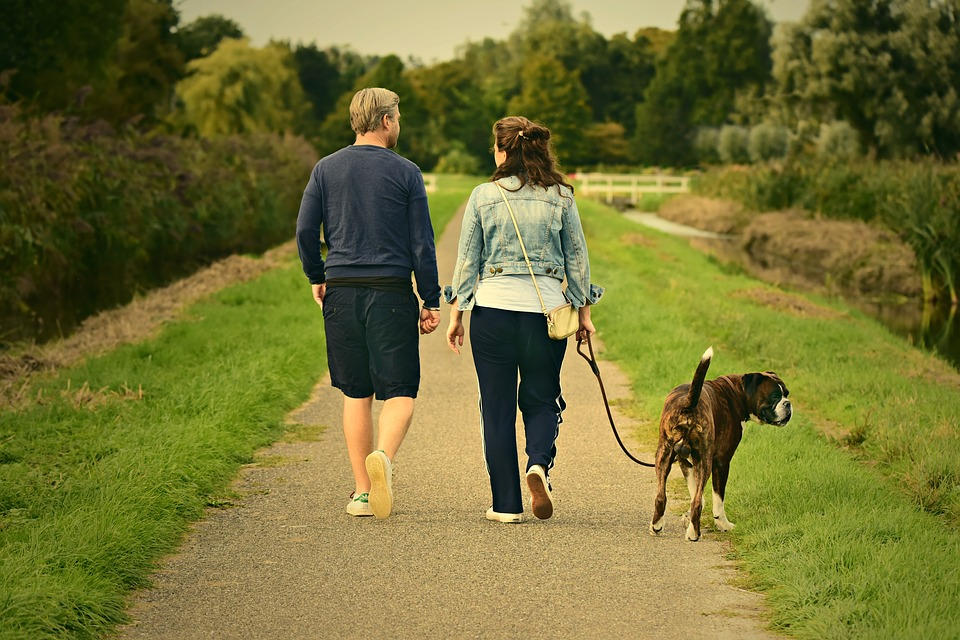

In [4]:
from IPython.display import Image
Image(IMAGE_PATH)

In [5]:
%%time
# submit the request
response = requests.post(PREDICT_URL, files=payload)

CPU times: user 6.93 ms, sys: 0 ns, total: 6.93 ms
Wall time: 43.8 ms


In [6]:
response.status_code

200

In [7]:
response.json()

{'predictions': [{'confidence': '98.828125',
   'label': 'person',
   'x_max': 601,
   'x_min': 447,
   'y_max': 522,
   'y_min': 103},
  {'confidence': '95.3125',
   'label': 'person',
   'x_max': 443,
   'x_min': 294,
   'y_max': 534,
   'y_min': 91},
  {'confidence': '26.953125',
   'label': 'horse',
   'x_max': 795,
   'x_min': 631,
   'y_max': 542,
   'y_min': 356},
  {'confidence': '6.640625',
   'label': 'cow',
   'x_max': 790,
   'x_min': 749,
   'y_max': 421,
   'y_min': 380}],
 'success': True}

## Process response

In [8]:
import helpers
CONFIDENCE = 50 # A threshold percentage for confidence

In [9]:
mydict = {'a':1, 'b': 2}
list(mydict.values())

[1, 2]

In [10]:
# ensure the request was successful
if response.status_code == 200:
    predictions = response.json()['predictions']
    
    # loop over the predictions and display them
    for result in predictions:
        print("{}: {}".format(result["label"], result["confidence"]))

person: 98.828125
person: 95.3125
horse: 26.953125
cow: 6.640625


In [11]:
helpers.get_object_classes(predictions, CONFIDENCE)

{'person'}

In [12]:
helpers.get_object_instances(predictions, 'person', CONFIDENCE)

2

In [13]:
helpers.get_objects_summary(predictions, CONFIDENCE)

{'person': 2}

## Draw bounding boxes

In [14]:
from PIL import Image
from PIL import ImageDraw
%matplotlib inline

In [15]:
image = Image.open(IMAGE_PATH)  # PIL img object.
draw = ImageDraw.Draw(image)

In [16]:
image_width = image.size[0]
image_width

960

In [17]:
image_height = image.size[1]
image_height

640

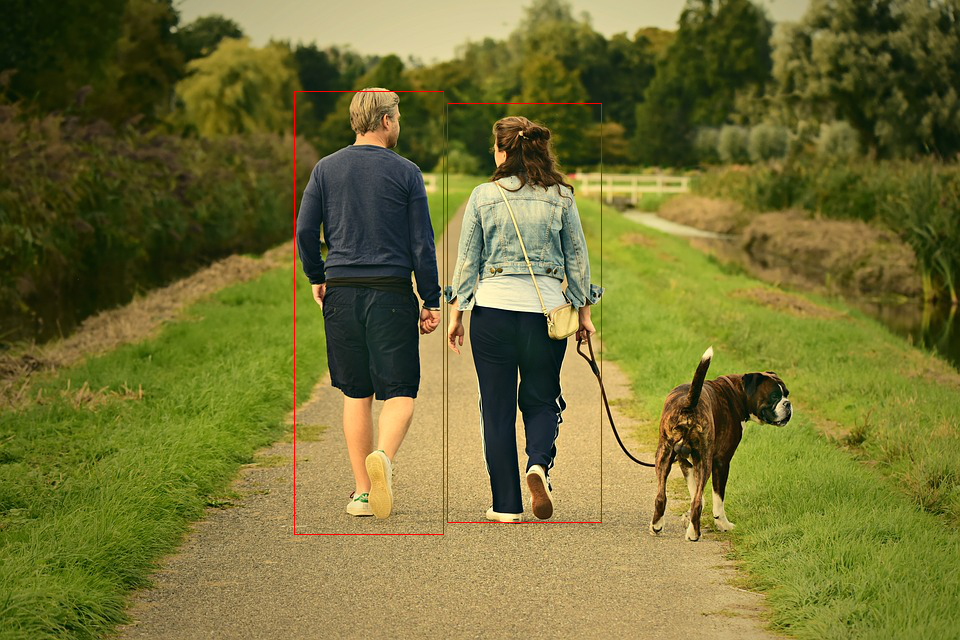

In [18]:
for result in predictions:
    # bounding_box = list(b_box.values())
    if float(result["confidence"]) > CONFIDENCE:
        bounding_box = [result['x_min'], result['y_min'], result['x_max'], result['y_max']]
        draw.rectangle(bounding_box, outline='red')
        
display(image)